In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from  sklearn.metrics import accuracy_score

In [2]:
dataFrame_train = pd.read_csv('train.csv') 
data_test = pd.read_csv('test.csv')
data_pred =  pd.read_csv('gender_submission.csv')

In [3]:
dataFrame_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataFrame_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
dataFrame_train.shape

(891, 12)

In [6]:
dataFrame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
dataFrame_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<BarContainer object of 2 artists>

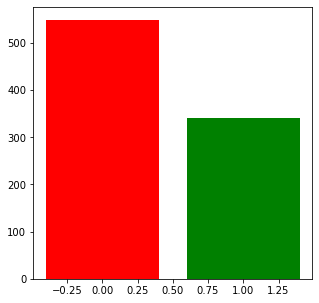

In [8]:
plt.figure(figsize=(5,5))
plt.bar(list(dataFrame_train['Survived'].value_counts().keys()),list(dataFrame_train['Survived'].value_counts()),color=['r','g'])

<BarContainer object of 3 artists>

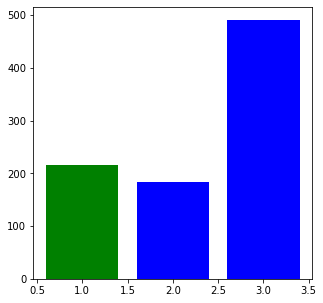

In [9]:
plt.figure(figsize=(5,5))
plt.bar(list(dataFrame_train['Pclass'].value_counts().keys()),list(dataFrame_train['Pclass'].value_counts()),color=['b','g','b'])

<BarContainer object of 2 artists>

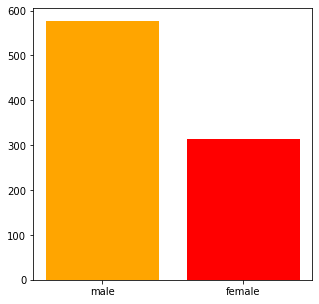

In [10]:
plt.figure(figsize=(5,5))
plt.bar(list(dataFrame_train['Sex'].value_counts().keys()),list(dataFrame_train['Sex'].value_counts()),color =['orange','red'])

Text(0, 0.5, 'People')

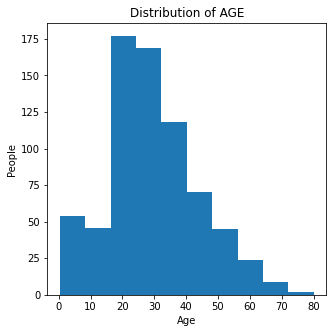

In [11]:
plt.figure(figsize=(5,5))
plt.hist(dataFrame_train['Age'])
plt.title('Distribution of AGE')
plt.xlabel('Age')
plt.ylabel('People')

In [12]:
dataFrame_train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [13]:
dataFrame_train=dataFrame_train[['Survived', 'Age','Fare']]

In [14]:
corr_matrix =dataFrame_train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Age        -0.077221
Name: Survived, dtype: float64

<AxesSubplot:>

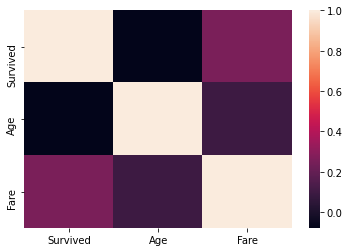

In [15]:
import seaborn as sns
sns.heatmap(dataFrame_train.corr())

In [16]:
dataFrame_test=pd.merge(data_test,data_pred,on='PassengerId')

In [17]:
dataFrame_test=dataFrame_test[['Survived', 'Age','Fare']]

In [18]:
dataFrame_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Age       332 non-null    float64
 2   Fare      417 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 13.1 KB


In [19]:
dataFrame_train.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [20]:
dataFrame_train= dataFrame_train.dropna()

In [21]:
dataFrame_test= dataFrame_test.dropna()

In [22]:
train_X = dataFrame_train.iloc[:,1:]
train_y = dataFrame_train.iloc[:,0]
test_X = dataFrame_test.iloc[:,1:]
test_y =dataFrame_test.iloc[:,0]


In [23]:
test_X.head()

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000
2,62.0,9.6875
3,27.0,8.6625
4,22.0,12.2875


In [24]:
train_X.shape,train_y.shape,test_X.shape,test_y.shape

((714, 2), (714,), (331, 2), (331,))

In [25]:
svc = SVC()

In [26]:
svc.fit(train_X,train_y)

SVC()

In [27]:
sY_pred = svc.predict(test_X) 

In [28]:

accuracy_score(test_y,sY_pred)

0.6374622356495468

## The Accuarcy of data is 63  %